In [1]:
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_VISIBLE_DEVICES=0


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential, load_model, model_from_json

%matplotlib inline

In [10]:
# !pip install -r requirments.txt

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirments.txt'


In [15]:
from tensorflow.keras.models import load_model, Model
from tensorflow.python.keras import backend as K

sess = tf.compat.v1.Session()

config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess=tf.compat.v1.Session(config=config)
K.set_session(sess)

In [16]:
from facial_analysis import FacialImageProcessing
imgProcessing=FacialImageProcessing(False)

# Tensorflow

In [17]:
model=load_model('../models/affectnet_emotions/mobilenet_7.h5')
model.summary()

Model: "model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_1 (InputLayer)            │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_pad (ZeroPadding2D)       │ (None, 225, 225, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 112, 112, 32)   │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 112, 112, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 112, 112, 32)   │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 112, 112, 64)   │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 113, 113, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 56, 56, 64)     │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 56, 56, 128)    │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 56, 56, 128)    │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 56, 56, 128)    │        16,384 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,493,063 (13.32 MB)

 Trainable params: 3,471,175 (13.24 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [18]:
def mobilenet_preprocess_input(x,**kwargs):
    x[..., 0] -= 103.939
    x[..., 1] -= 116.779
    x[..., 2] -= 123.68
    return x
preprocessing_function=mobilenet_preprocess_input
INPUT_SIZE = (224, 224)

In [22]:
idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}

In [25]:
!pwd

/d/namadgi/fer/face-emotion-recognition/src


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


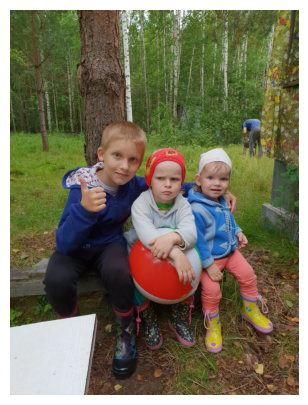

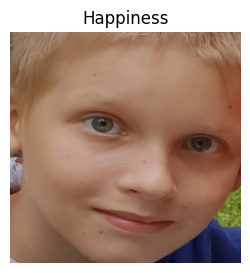

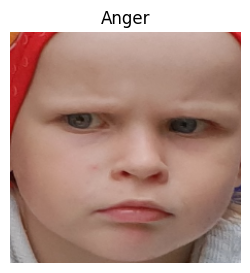

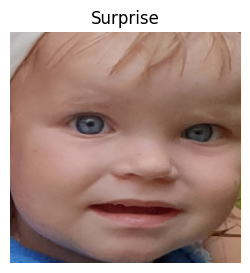

In [27]:
import matplotlib.pyplot as plt
fpath='../test_images/20180720_174416.jpg'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
plt.axis('off')
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for i, (bbox, p) in enumerate(zip(bounding_boxes, points)):
    box = bbox.astype(int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    face_img=cv2.resize(face_img, INPUT_SIZE)
    cv2.imwrite(f'../test_images/{i}.jpg', cv2.cvtColor(face_img, cv2.COLOR_RGB2BGR))
    inp=face_img.astype(np.float32)
    inp[..., 0] -= 103.939
    inp[..., 1] -= 116.779
    inp[..., 2] -= 123.68
    inp = np.expand_dims(inp, axis=0)
    scores=model.predict(inp)[0]
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(idx_to_class[np.argmax(scores)])

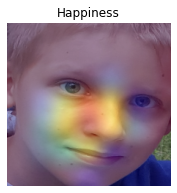

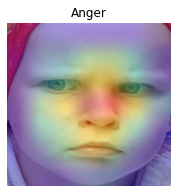

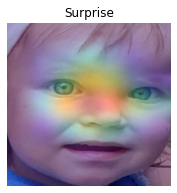

In [9]:
# Code borrowed from https://keras.io/examples/vision/grad_cam/
import matplotlib.cm as cm
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()
def save_and_display_gradcam(face_img, alpha=0.4):
    last_conv_layer_name = "conv_pw_13"
    inp=face_img.astype(np.float32)
    inp=preprocessing_function(inp)
    inp = np.expand_dims(inp, axis=0)
    # Remove last layer's softmax
    model.layers[-1].activation = None

    # Print what the top predicted class is
    scores = model.predict(inp)[0]

    # Generate class activation heatmap
    heatmap = make_gradcam_heatmap(inp, model, last_conv_layer_name)

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = tf.keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((face_img.shape[1], face_img.shape[0]))
    jet_heatmap = tf.keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + face_img
    superimposed_img = tf.keras.preprocessing.image.array_to_img(superimposed_img)
    #superimposed_img.save(cam_path)
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.title(idx_to_class[np.argmax(scores)])
    plt.imshow(superimposed_img)


for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    face_img=cv2.resize(face_img,INPUT_SIZE)
    save_and_display_gradcam(face_img)

# PyTorch

In [7]:
import torch
from PIL import Image
from torchvision import transforms
use_cuda = torch.cuda.is_available()
print(use_cuda)
device = 'cuda' if use_cuda else 'cpu'

True


In [17]:
USE_ENET2=False
NUM_EMOTIONS=8 #7 #
if NUM_EMOTIONS==7:
    idx_to_class={0: 'Anger', 1: 'Disgust', 2: 'Fear', 3: 'Happiness', 4: 'Neutral', 5: 'Sadness', 6: 'Surprise'}
else:
    idx_to_class={0: 'Anger', 1: 'Contempt', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Neutral', 6: 'Sadness', 7: 'Surprise'}
if USE_ENET2:
    IMG_SIZE=260
    if NUM_EMOTIONS==7: # 7 emotions
        PATH='../models/affectnet_emotions/enet_b2_7.pt'
    else:
        PATH='../models/affectnet_emotions/enet_b2_8.pt'
else:
    IMG_SIZE=224
    if NUM_EMOTIONS==7: # 7 emotions from AFFECT_IMG_SEVEN_TRAIN_DATA_DIR and AFFECT_IMG_SEVEN_VAL_DATA_DIR
        PATH='../models/affectnet_emotions/enet_b0_7.pt'
    else:
        #PATH='../models/affectnet_emotions/enet_b0_8_best_vgaf.pt'
        PATH='../models/affectnet_emotions/enet_b0_8_best_afew.pt'

In [18]:
test_transforms = transforms.Compose(
    [
        transforms.Resize((IMG_SIZE,IMG_SIZE)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
    ]
)
print(PATH)
model = torch.load(PATH,map_location=torch.device('cpu'))
model=model.to(device)
model.eval()

../models/affectnet_emotions/enet_b0_8_best_afew.pt


EfficientNet(
  (conv_stem): Conv2dSame(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  (act1): SiLU(inplace=True)
  (blocks): Sequential(
    (0): Sequential(
      (0): DepthwiseSeparableConv(
        (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
        (bn1): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act1): SiLU(inplace=True)
        (se): SqueezeExcite(
          (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
          (act1): SiLU(inplace=True)
          (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
        )
        (conv_pw): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn2): BatchNorm2d(16, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
        (act2): Identity()
      )
    )
    (1): Sequential(
      (0

happy [('Anger', -18.100704), ('Contempt', -15.970097), ('Disgust', -11.288388), ('Fear', -11.906535), ('Happiness', -2.4166257), ('Neutral', -17.840893), ('Sadness', -12.970083), ('Surprise', -12.333415)]
fear [('Anger', 1.5692084), ('Contempt', 0.61146414), ('Disgust', 1.1993741), ('Fear', 1.5119122), ('Happiness', 0.036680836), ('Neutral', 1.6395429), ('Sadness', 0.50216746), ('Surprise', -0.31011397)]
contempt [('Anger', 1.678489), ('Contempt', 0.5379214), ('Disgust', 1.6153027), ('Fear', 0.28317714), ('Happiness', -0.58123046), ('Neutral', 2.3472142), ('Sadness', 1.6266464), ('Surprise', -2.16087)]
sadness [('Anger', 1.1448001), ('Contempt', 1.8608469), ('Disgust', -0.13100784), ('Fear', -0.070346564), ('Happiness', 1.765408), ('Neutral', 2.411077), ('Sadness', 0.84932566), ('Surprise', -1.9396251)]
disgust [('Anger', 1.7775831), ('Contempt', 1.3541901), ('Disgust', 2.1173127), ('Fear', 0.4286375), ('Happiness', 0.98161316), ('Neutral', 1.5061542), ('Sadness', 0.42718965), ('Surpr

<Figure size 360x360 with 0 Axes>

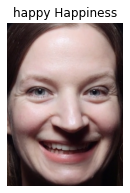

<Figure size 360x360 with 0 Axes>

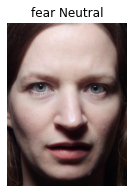

<Figure size 360x360 with 0 Axes>

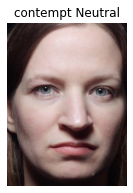

<Figure size 360x360 with 0 Axes>

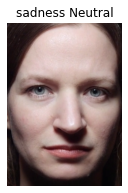

<Figure size 360x360 with 0 Axes>

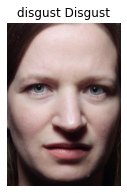

<Figure size 360x360 with 0 Axes>

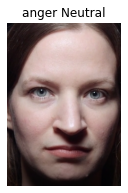

<Figure size 360x360 with 0 Axes>

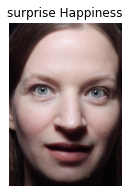

In [19]:
for fn in ['happy','fear','contempt','sadness','disgust','anger','surprise']:
    fpath='/home/avsavchenko/images/'+fn+'.png'
    frame_bgr=cv2.imread(fpath)
    plt.figure(figsize=(5, 5))
    frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
    bounding_boxes, points = imgProcessing.detect_faces(frame)
    points = points.T
    for bbox,p in zip(bounding_boxes, points):
        box = bbox.astype(np.int)
        x1,y1,x2,y2=box[0:4]    
        face_img=frame[y1:y2,x1:x2,:]

        img_tensor = test_transforms(Image.fromarray(face_img))
        img_tensor.unsqueeze_(0)
        scores = model(img_tensor.to(device))
        scores=scores[0].data.cpu().numpy()
        plt.figure(figsize=(3, 3))
        plt.axis('off')
        plt.imshow(face_img)
        plt.title(fn+' '+idx_to_class[np.argmax(scores)])
        print(fn,[(idx_to_class[i],scores[i]) for i in range(len(scores))])

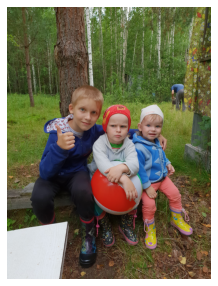

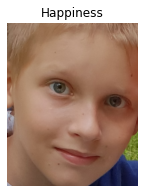

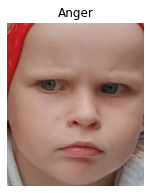

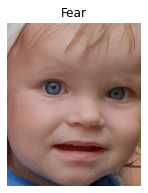

In [11]:
fpath='../test_images/20180720_174416.jpg'
frame_bgr=cv2.imread(fpath)
plt.figure(figsize=(5, 5))
frame = cv2.cvtColor(frame_bgr, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(frame)
bounding_boxes, points = imgProcessing.detect_faces(frame)
points = points.T
for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    img_tensor = test_transforms(Image.fromarray(face_img))
    img_tensor.unsqueeze_(0)
    scores = model(img_tensor.to(device))
    scores=scores[0].data.cpu().numpy()
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(face_img)
    plt.title(idx_to_class[np.argmax(scores)])

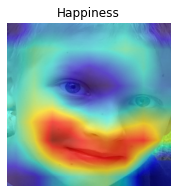

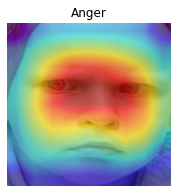

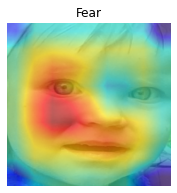

In [29]:
from pytorch_grad_cam import GradCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
target_layers = [model.blocks[-1][-1]]
# Construct the CAM object once, and then re-use it on many images:
cam = GradCAM(model=model, target_layers=target_layers, use_cuda=use_cuda)

for bbox,p in zip(bounding_boxes, points):
    box = bbox.astype(np.int)
    x1,y1,x2,y2=box[0:4]    
    face_img=frame[y1:y2,x1:x2,:]
    
    img_tensor = test_transforms(Image.fromarray(face_img))
    img_tensor.unsqueeze_(0)
    scores = model(img_tensor.to(device))
    scores=scores[0].data.cpu().numpy()
    grayscale_cam = cam(input_tensor=img_tensor, target_category=None)
    grayscale_cam = grayscale_cam[0, :]
    face_img=cv2.resize(face_img,(IMG_SIZE,IMG_SIZE))
    rgb_img = np.float32(face_img) / 255
    visualization = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
    plt.figure(figsize=(3, 3))
    plt.axis('off')
    plt.imshow(visualization)
    plt.title(idx_to_class[np.argmax(scores)])

In [30]:
imgProcessing.close()